### Overview

Scikit-learn is a machine learning library for Python. It is used to predict values from input data. It can be used to perform classification, regression, clusters, and various other functions.
In this notebook I have used the library to perform classifcation and regression on open datasets from data.gov.uk. Some cleaning of the data was required to 

For the regression model, I used data on consumer energy use across a nine-year period (2000 - 08). I found that increased use of consumer electronics was predictive of total energy use to an accuracy score of 99.7%.

For my classification task, I used NHS workforce data.
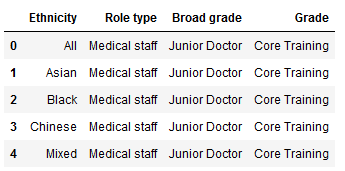

I used the Naive Bayes classification process to see if ethnicity was predicted by whether staff were junior doctors or other doctor grades. The model found that this was not predictive, with an accuracy score of only 0.06%.

The Scikit-learn library includes several built-in datasets, both real-world and toy datasets, as well as generators for producing new data. The library's sets are specialised for various ML tasks, enabling students and beginners to quickly grasp the fundamentals without needing to search otu and interpret public datasets. For example, the iris dataset (comparing petal and sepal measurements for three species of iris) and Olivetti faces dataset (containing a set of face images) are suited for classification tasks, while the diabetes and California housing sets are suited for regression.

Within the high-level tasks which the Scikit-learn library enables, there is a wide range of possible approaches for which built-in modules and functions exist, depending on the attributes of the data being examined. For example, classification tasks can be done through support vector machines with the __svm__ module, through decision trees with the __tree__ module, through stochastic gradient descent with __SGDClassifier__ function within the __linear_model__ module, etc.

In [22]:
workforce.head()

,Ethnicity,Role type,Broad grade,Grade
0,All,Medical staff,Junior Doctor,Core Training
1,Asian,Medical staff,Junior Doctor,Core Training
2,Black,Medical staff,Junior Doctor,Core Training
3,Chinese,Medical staff,Junior Doctor,Core Training
4,Mixed,Medical staff,Junior Doctor,Core Training


---

In [12]:
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Regression

In [13]:
df = pd.read_csv('scptb04a_elect_201004.csv')

In [14]:
df

,Year,Light,Cold,Wet,Consumer Electrics,Home Computing,Cooking,Total
0,2000,15.35,14.68,11.03,14.10,2.68,10.73,68.57
1,2001,15.26,14.59,11.16,14.63,3.04,10.81,69.49
2,2002,15.20,14.39,11.24,15.11,3.41,10.91,70.26
3,2003,15.15,14.14,11.32,15.88,3.76,11.01,71.26
4,2004,15.12,13.89,11.52,16.70,4.25,11.10,72.58
5,2005,15.09,13.67,11.72,17.07,4.67,11.19,73.42
6,2006,15.06,13.38,11.82,17.32,4.99,11.28,73.86
7,2007,15.03,13.07,11.91,17.65,5.26,11.33,74.24
8,2008,14.54,12.77,12.09,17.75,5.44,11.37,73.97


In [15]:
df_electronicstotal = df[['Consumer Electrics','Total']]

In [16]:
df_electronicstotal

,Consumer Electrics,Total
0,14.10,68.57
1,14.63,69.49
2,15.11,70.26
3,15.88,71.26
4,16.70,72.58
5,17.07,73.42
6,17.32,73.86
7,17.65,74.24
8,17.75,73.97


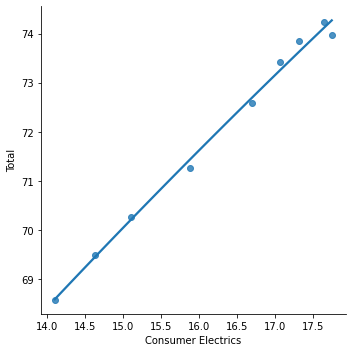

In [17]:
sns.lmplot(x ="Consumer Electrics", y ="Total", data = df_electronicstotal, order = 2, ci = None)

In [18]:
X = np.array(df_electronicstotal['Consumer Electrics']).reshape(-1, 1)
y = np.array(df_electronicstotal['Total']).reshape(-1, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [20]:
regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.9977492701376859


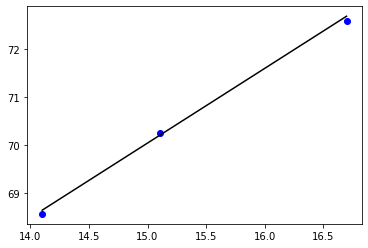

In [21]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

---

## Classification

In [2]:
workforce = pd.read_csv('nhs_workforce.csv')
workforce

,Ethnicity,Role type,Broad grade,Grade
0,All,Medical staff,Junior Doctor,Core Training
1,Asian,Medical staff,Junior Doctor,Core Training
2,Black,Medical staff,Junior Doctor,Core Training
3,Chinese,Medical staff,Junior Doctor,Core Training
4,Mixed,Medical staff,Junior Doctor,Core Training
5,Other,Medical staff,Junior Doctor,Core Training
6,Unknown,Medical staff,Junior Doctor,Core Training
7,White,Medical staff,Junior Doctor,Core Training
8,All,Medical staff,Junior Doctor,Foundation Doctor Year 1
9,Asian,Medical staff,Junior Doctor,Foundation Doctor Year 1


In [3]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
le = preprocessing.LabelEncoder()
grade_encoded = le.fit_transform(workforce['Grade'])
print(grade_encoded)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5]


In [4]:
broad_grade_encoded = le.fit_transform(workforce['Broad grade'])
print(broad_grade_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0]


In [7]:
labels = le.fit_transform(workforce['Ethnicity'])
print(labels)

[0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7]


In [8]:
features=zip(grade_encoded,broad_grade_encoded)
features = list(features)
print(features)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (5, 0), (5, 0), (5, 0), (5, 0), (5, 0), (5, 0), (5, 0), (5, 0)]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [10]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [11]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.06666666666666667
